### Number of Differences EADAM, MM

This graph looks at the total number of differences between the EADAM and GS and MM and gale shapley respectively. Creates a Histogram to compare them. So these are the number of changes each algorithm inflicts on the original GS matching. 

#### Histograms


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [27]:
def get_data(n, k, eadam=False):
    if eadam == True:
        df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_diff_eadam.csv')
        df['n_changes_eadam'] = df['n_changes_eadam']/2
    else:
        df = pd.read_csv(f'data/simulations/max_length_matches/n_{n}_k_{k}_max_length_diff.csv')
    return df

In [43]:
def get_combined(n,k):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_diff.csv')
    df_eadam = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_diff_eadam.csv')
    #df_eadam = df_eadam.iloc[:-10, :]
    #df = df.iloc[:-10, :]
    df_eadam['n_changes_eadam'] = df_eadam['n_changes_eadam']/2
    df['label'] = 'MM'
    df_eadam['label'] = 'EADAM'
    df_eadam.columns = df.columns
    df = pd.concat([df, df_eadam])
    return df

In [60]:
df = get_combined(4000, 5)

FileNotFoundError: [Errno 2] No such file or directory: 'data/simulations/max_length_matches_w_eadam/n_4000_k_5_max_diff.csv'

In [61]:
df

,Unnamed: 0,n,k,n_changes,n_matches,label
0,0,3000,5,81.0,2708,MM
1,1,3000,5,79.0,2737,MM
2,2,3000,5,89.0,2747,MM
3,3,3000,5,16.0,2743,MM
4,4,3000,5,72.0,2721,MM
...,...,...,...,...,...,...
9995,9995,3000,5,80.0,2728,EADAM
9996,9996,3000,5,111.0,2722,EADAM
9997,9997,3000,5,43.0,2717,EADAM
9998,9998,3000,5,38.0,2727,EADAM


<Axes: xlabel='n_changes', ylabel='Count'>

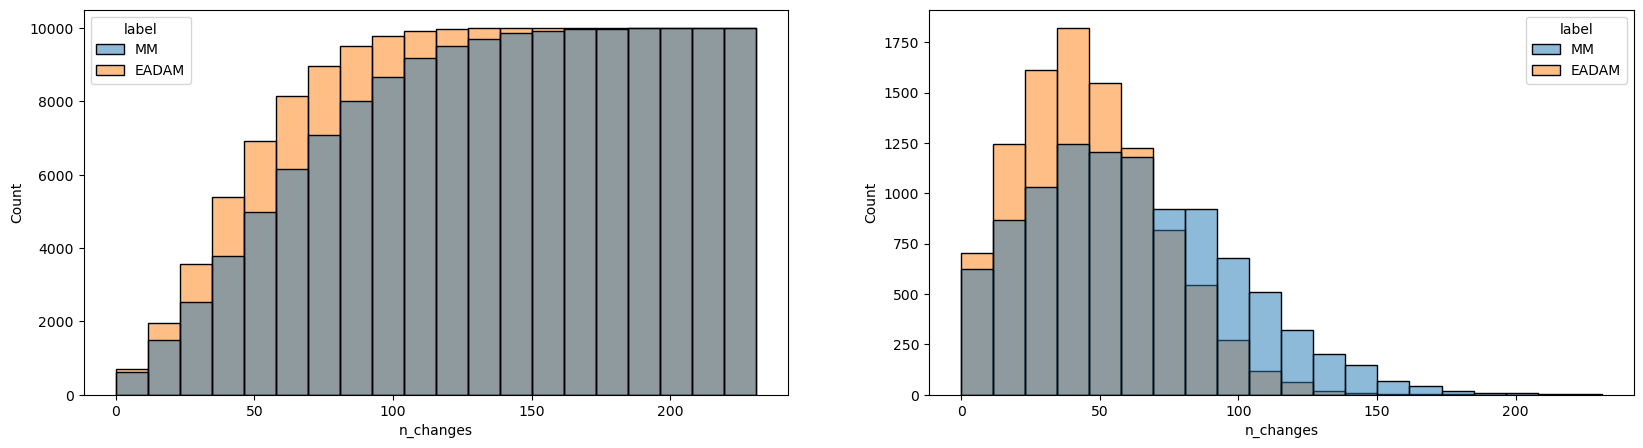

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=df, x='n_changes', hue='label', ax=ax[1], bins=20)
sns.histplot(data=df, x= 'n_changes', stat="count", cumulative=True, ax=ax[0], hue='label', bins=20) 

### Mean and Standard Deviation of the number of differences between the EADAM and GS and MM and gale shapley respectively:

This is to be added to the table we're making which collects some useful information. 

In [128]:
df = get_combined(4000, 5)

FileNotFoundError: [Errno 2] No such file or directory: 'data/simulations/max_length_matches_w_eadam/n_4000_k_5_max_diff.csv'

In [126]:
df.groupby('label').mean()

,Unnamed: 0,n,k,n_changes,n_matches
label,,,,,
EADAM,4999.5,4000.0,4.0,5.3703,3526.3994
MM,4999.5,4000.0,4.0,5.4877,3526.3994


In [127]:
std = np.sqrt(df.groupby('label').var(ddof=1)/10000)

In [122]:
std

,Unnamed: 0,n,k,n_changes,n_matches
label,,,,,
EADAM,28.868957,0.0,0.0,0.254187,0.101104
MM,28.868957,0.0,0.0,0.361927,0.101104
